# Part 2: EDA
**Predicting Electric Vehicle(EV) chargepoints in England)**

The EDA - Part 2 approach will be to investigate:
1. The proposed features and how they are distributed (normal, skew etc)
2. Outliers that exist and attempt to address them
3. Correlation between the features and the target variable

## Definitions

**EV charge point/charging unit** – a single upstand or wall-mounted structure offering one or more socket outlets or tethered plugs suitable for charging EVs.

**EV charging station** – a physical site with at least one charge point installed suitable for charging at least two EVs. A station usually (but not always) has other physical structures accompanying the charge point(s) such as an energy supply enclosure (feeder pillar), weather shelter, signage, protection barriers for the equipment.

**Middle Layer Super Output Area (MSOA)** - A government tracked area that has a minimum population size of 5,000 and a maximum population size of 15,000



| **Geography** | **Min. population** | **Max. population** | **Min. no. of households** | **Max. no. of households** |
| ------------- | ---------------------- | ---------------------- | -------------------------------- | -------------------------------- |
| LSOA          | 1,000                  | 3,000                  | 400                              | 1,200                            |
| MSOA          | 5,000                  | 15,000                 | 2,000                            | 6,000                            |

## Summary

### Distributions
>*The distribution of feature variables are mostly positively skewed with only 4.1% being normally distributed; Significant outliers in the variables exist*

#### Details

1. 4.1% of feature variables (11) were normally distributed based on a skew criterion of within $\pm 0.5$ and a kurtosis criterion of $\pm3$.
2. The remaining variables were positively skewed
3. The `cycle_from_work_nhb` feature had a distribution most similar to the number of EV chargepoints
4. Most variables had substantial amount of outliers

The variables that had *normal distributions* in the data across all MSOAs were:

***Socio-Economic - Normally Distributed variables***<br>

| **variable** | **description** |
| :------------ | :--------------------- |
| `chanyp_score` | the lack of attainment and skills in the local population relating to children and young people | 
| `adultskills_score` | the lack of attainment and skills in the local population relating to adult skills | 
| `widerbar_score` | barriers to housing and local services based on affordability| 
| `geo_bar_scor` | barriers to housing and local services based on physical proximity of local services | 
| `indoor_score` | the quality of the local environment based on quality of housing (indoors) | 
| `outdoor_score` | the quality of the local environment based on  air quality and road traffic accidents (outdoors) | 
| `heatlh_score` | the risk of premature death and the impairment of quality of life through poor physical or mental health | 
| `crime_score` | the risk of personal and material victimisation at local level | 


<table>
    <tr>
        <td>
            <img src="../reports/figures/eda_graphs/indoor_score_hist_bar.jpg" style= "height:150px">
        </td>
        <td>
            <img src="../reports/figures/eda_graphs/crime_score_hist_bar.jpg" style= "height:150px">
        </td>
    </tr>
</table>

________________________________
***Transport & Car related - Normally Distributed variables***<br>

|**variable**|**description**|
| :----------------- | :-------------- |
| `cardriver_from_friends` |average weekday number of journeys done by driving from visit friends (home-based) |
| `two_car` |number of people who own 2 cars in the MSOA |
| `total_cars` |total number of cars in the MSOA |

<table>
    <tr>
        <td>
            <img src="../reports/figures/eda_graphs/cardriver_from_friends_hist_bar.jpg" style= "height:150px">
        </td>
        <td>
            <img src="../reports/figures/eda_graphs/crime_score_hist_bar.jpg" style= "height:150px">
        </td>
    </tr>
</table>

### Transformations
> *In order to address some of the outliers the data was transformed. This included logarithmic and power transformations (Box-Cox or Yeo-Johnson) to aggregation with final standardisation*

***Socio-Economic***<br>
<table>
    <tr>
        <td>
            <img src="../reports/figures/eda_graphs/socio_econ1_transform.jpg" style= "width:80%" align='left'>
         </td>
    </tr>
</table>

***Population & Income***<br>
<table>
    <tr>
        <td>
            <img src="../reports/figures/eda_graphs/pop_income_transform.jpg" style= "width:80%" align='left'>
        </td>
    </tr>
</table>

***Transportation***<br>

<table>
    <tr>
        <td>
            <img src="../reports/figures/eda_graphs/transport_transform.jpg" style= "width:80%" align='left'>
        </td>
    </tr>
</table>

***Electricity***<br>
<table>
    <tr>
        <td>
            <img src="../reports/figures/eda_graphs/electricity_transform.jpg" style= "width:80%" align='left'>
        </td>
    </tr>
</table>

### Correlations
>*There is weak correlation between most features with transportation features showing the best correlations*

<table>
    <tr>
        <td>
            <img src="../reports/figures/correlations/most_correlated.jpg" style= "height:500px" align='left'>
        </td>
    </tr>
</table>

#### Which features are most correlated to the number of EV charge points?
>The number of non-domestic electricity meters (`nd_meters`) and the number of weekday journeys by carpooling to employers business (`carpassenger_empbus`) had the highest correlation with the logarithm of the number of EV charge points

The features that were correlated to the logarithm of the number of EV charge points in the various domains were as follows:

>**Socio-Economic:** *Working age population size and barriers to housing*<br> 
`workingage_pop`(0.223)<br>
`16_59_pop`(0.218)<br>

>**Transportation:** *Number of journeys by car,rail, walking and bus to employers business; cycling to social events*<br>
`carpassenger_empbus` (0.421)<br>
`rail_empbus`(0.414)<br>
`cardriver_empbus` (0.409)
`cycle_social`(0.402)<br>
`walk_empbus` (0.377)<br>
`buscoach_empbus` (0.348)<br>

>**Car Ownership:** *No car ownership*<br>
`no_car`(0.19)<br>

>**Geo-spatial:** *Number of train stations and their respective mean distances*<br>
`num_train_st`(0.235), and `train_st_distance`(0.233)<br>

>**Electricity Consumption:** *Non-domestic electricity consumption rates and the number of non-domestic electricity meters*<br>
`elec_nd_con`(0.439), and `nd_meters`(0.447)<br>

|                     |   charge_points |   charge_pt_cbrt |   charge_pt_log |
|---------------------|-----------------|------------------|-----------------|
| rail_empbus         |           0.322 |            0.406 |           0.414 |
| nd_meters           |           0.322 |            0.45  |           0.447 |
| cycle_empbus        |           0.319 |            0.388 |           0.397 |
| rail_social         |           0.318 |            0.388 |           0.398 |
| cycle_social        |           0.314 |            0.398 |           0.402 |
| elec_nd_con         |           0.309 |            0.442 |           0.439 |
| carpassenger_empbus |           0.306 |            0.422 |           0.421 |
| buscoach_empbus     |           0.302 |            0.337 |           0.348 |
| walk_empbus         |           0.299 |            0.37  |           0.377 |
| buscoach_social     |           0.299 |            0.337 |           0.347 |
| cardriver_empbus    |           0.297 |            0.412 |           0.409 |
| walk_social         |           0.272 |            0.34  |           0.345 |
| cardriver_work      |           0.232 |            0.312 |           0.309 |
| workingage_pop      |           0.223 |            0.252 |           0.26  |
| 16_59_pop           |           0.22  |            0.247 |           0.255 |
| num_train_st        |           0.215 |            0.23  |           0.235 |
| train_st_distance   |           0.213 |            0.228 |           0.233 |
| no_car              |           0.181 |            0.18  |           0.19  |
| carpassenger_work   |           0.176 |            0.234 |           0.231 |

### Collinearity

> ***1. `Low income affecting old people` may have effects on car ownership and unemployment rate in an area***

<img src="../reports/figures/correlations/idaopi_correlation.jpg" height=100px align='left'>

**The higher the proportion of the population experiencing deprivation relating to low income (high `idaopi score`) which affects old people:**
1. the higher the proportion of the population that has no car
2. the higher the proportion of the working-age population in an area involuntarily excluded from the labour market (high `employment_score`)
3. The easier it is to access housing and local services(financially & physically) because of physical proximity (low `geo_bar_score`)
____

> ***2. `Access to housing and local services` may be a variable that is highlighting the differences between urban and rural britain***
- High values for geo_bar_score is possibly a rural area with lower values possibly being urban

<img src="../reports/figures/correlations/geo_bar_correlation.jpg" align='left'>

**The harder it is to access housing and local services because of physical proximity to those services in an area**:

1. the higher the number of people who own 3+ cars
2. the larger the geographic area in square meters
3. the higher the median 2018 domestic electricity consumption in the area
4. the lower the weekday number of journeys done by bus/coach to work
___

> ***3. `Number of weekday journeys to visit friends by car` may also be a variable that is highlighting the differences between urban and rural britain***
- High values for cardriver_friends suggest high car ownership and high domestic electricity consumption in a given area

<img src="../reports/figures/correlations/cardriver_friends_correlation.jpg" align='left'>

**The higher the weekday number of journeys done by driving to/from visiting friends**:

1. the higher the number of cars owned in the area
2. the higher the 2018 domestic electricity consumption in the area
___

> ***4. `Number of domestic electricity meters` in an area may be indicating residential density***
- Higher values for d_meters suggest a more residential dense area whereas lower values suggest a sparse residential density

<img src="../reports/figures/correlations/d_meters_correlation.jpg" align='left'>

**The higher the number of domestic electricity meters in an area**:

1. the higher the number of people who own 1 car in the area
2. the higher the working age population size in the area
3. the higher the total population size in the area
___

> ***5. `Over 60 age population` in an area could be responsible for how much cars are used to visit friends during the week***
- Higher values for over60_pop suggest a more car ownership and more weekday journeys to visit friends

<img src="../reports/figures/correlations/over60_correlation.jpg" align='left'>

**The higher the over 60 population size:**
1. the higher number of people who own 2 cars
2. the higher the weekday number of journeys done by driving to visit friends
___

> ***5. `Number of non-domestic meters` may indicate the level to which an area is industrialised or commercialised***
- Higher values for nd_meters suggest more weekday travel to conduct employers business and may suggest the presence of more electric charge points

<img src="../reports/figures/correlations/nd_meters_correlation.jpg" align='left'>

**The higher the number of non-domestic electricity meters in an area**:

1. the higher the weekday number of journeys done by driving to/from employers business in the area
2. the higher the weekday number of journeys done by car pooling to/from employers business in the area
3. the higher the number of charge points in the area

### Variations

## Limitations

### Findings
1. Weak linear correlations with the number of EV charge points in an area will limit the modelling of this problem to a classification approach. Focus will be to also use non-linear classifiers(tree ensembles,boosting, bagging, knn etc)

2. Exact figures for EV car registrations per MSOA was difficult to acquire. Therefore an estimate based on EV ownership per local authority was used as a gauge for EV car registrations per MSOA

### Surprises
1. EV car ownership had a weak correlation to the number of EV charge points in an area
2. Non-domestic electricity consumption in an area is highly correlated to the number of journeys people make by any mode to  do shopping, attend social events or conduct employers business!

### Next Steps
1. Model EV chargepoint estimation using a classification approach
2. Ensure preprocessing scripts perform variable transformation to reduce outliers and avoid skewed distributions.
3. Focus on precision/F1 score when modelling given the sparse distribution of EV charge points across the country (uneven class weighting). If this model is ultimately geared towards identifying areas that should have charge points for future public/private investment, having a high precision is critical.
3. Utilize logistic regression after transformation or use an ensemble or KNN modeling approach due to non-linearity.

## Detailed Coding

### Packages

In [2]:
# Importing all needed packages
%run "../src/packages/packages_for_project.py"

# Importing data dictionary
%run "../data/raw/data_dictionary.py"

# Importing prepared dataframe with chargepoint information (features and target)
df = pd.read_csv("../data/interim/msoa/full_dataset_msoa.csv")

### Notebook Specific Functions

In [3]:
# Importing project specific functions
%run "../src/functions/functions_for_project.py"

### Distributions of Features

#### Socio-Economic Features

>- Based on the table, histograms and boxplots below, **8 out of 15** socio-economic features have approximately normal distributions. The remaining 7 were all positively skewed.
>- Fix: A 'box-cox' transformation will be used for the features that had skewed distributions to establish some normality. 

>1. `indoor_score` was the most normally distributed
>2. `idaopi_score` distribution was the most skewed


    
| variable          | skewed?   |   skew |   kurtosis |   mean |
|-------------------|-----------|--------|------------|--------|
| idaopi_score      | True      |  1.394 |      2.114 |  0.165 |
| employment_score  | True      |  1.23  |      1.541 |  0.1   |
| income_score      | True      |  1.141 |      0.968 |  0.128 |
| education_score   | True      |  1.078 |      0.785 | 21.627 |
| idaci_score       | True      |  0.943 |      0.444 |  0.158 |
| livenv_score      | True      |  0.762 |      0.149 | 21.841 |
| housebar_score    | True      |  0.707 |      0.363 | 21.79  |
| widerbar_score    | False     |  0.458 |     -0.153 | -0.024 |
| outdoor_score     | False     |  0.383 |     -0.047 | -0.008 |
| adultskills_score | False     |  0.333 |     -0.189 |  0.306 |
| geo_bar_score     | False     |  0.245 |      0.251 |  0.014 |
| health_score      | False     |  0.102 |     -0.202 | -0.008 |
| chanyp_score      | False     |  0.055 |     -0.235 | -0.003 |
| crime_score       | False     |  0.041 |     -0.341 | -0.004 |
| indoor_score      | False     |  0.022 |      0.208 |  0.012 |

<table>
    <tr>
        <td>
            <img src="../reports/figures/eda_graphs/idaopi_score_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
        <td>
           <img src="../reports/figures/eda_graphs/indoor_score_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
    </tr>
</table>

[Click here for ALL socio-economic plots](z_eda_socio_econ.ipynb)

#### Population & Income Features

> - Based on the table, histograms and boxplots below, all features are positively skewed.
> - Fix: A logarithmic transformation followed by a 'box-cox' transformation will be used to establish some normality. 

>1. `total_netafterhsing` was the most normally distributed
>2. `workingage_pop` distribution was the most skewed

| variable            | skewed?   |   skew |   kurtosis |     mean |
|---------------------|-----------|--------|------------|----------|
| workingage_pop      | True      |  1.528 |      4.665 |  4698.99 |
| 16_59_pop           | True      |  1.472 |      4.278 |  4669.46 |
| under16_pop         | True      |  1.264 |      3.278 |  1532.18 |
| total_pop           | True      |  0.961 |      1.441 |  8058.93 |
| total_inc           | True      |  0.92  |      1.162 | 42103.7  |
| total_netinc        | True      |  0.877 |      1.834 | 33411.6  |
| total_netb4hsing    | True      |  0.852 |      1.195 | 31034.6  |
| over60_pop          | True      |  0.692 |      0.965 |  1857.29 |
| total_netafterhsing | True      |  0.586 |      0.444 | 27371.3  |

<table>
    <tr>
        <td>
            <img src="../reports/figures/eda_graphs/workingage_pop_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
        <td>
           <img src="../reports/figures/eda_graphs/total_netafterhsing_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
    </tr>
</table>

[Click here for ALL population-income plots](z_eda_population_income.ipynb)

#### Transportation Features

> Based on the table, histograms and boxplots below, all features are positively skewed with the exception of one. There were no negative values however not all were non-zero.

> Fix: In order to address zero values the features were aggregated together based on simulatrity to the mode of transportation. After aggregation a logarithmic transformation followed by a 'box-cox' power transformation was used to compress the figures and address the skewness and some outliers.

>1. `cardriver_friends` was the most normally distributed
>2. `rail_work` distribution was the most skewed

| variable                        | skewed?   |   skew |   kurtosis |     mean |
|---------------------------------|-----------|--------|------------|----------|
| rail_from_work                  | True      | 43.975 |   2534.33  |  283.477 |
| rail_to_work                    | True      | 42.506 |   2411.42  |  283.478 |
| rail_to_empbus_nhb              | True      | 40.889 |   2230.6   |   12.5   |
| walk_from_personbus_nhb         | True      | 40.501 |   2407.32  |   54.766 |
| rail_to_personbus_nhb           | True      | 39.955 |   2106.52  |    3.297 |
| ..................              | .....     |  ..... |      ....  |   ...... |
| cycle_from_friends              | True      |  1.021 |      2.94  |   29.065 |
| walk_from_friends               | True      |  0.953 |      1.462 |  350.994 |
| cardriver_to_friends            | True      |  0.807 |      1.544 |  777.414 |
| carpassenger_from_friends       | True      |  0.75  |      0.605 |  595.595 |
| cardriver_from_friends          | False     |  0.407 |      0.523 |  777.413 |

<table>
    <tr>
        <td>
            <img src="../reports/figures/eda_graphs/rail_from_work_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
        <td>
           <img src="../reports/figures/eda_graphs/cardriver_from_friends_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
    </tr>
</table>

[Click here for ALL transportation plots](z_eda_transportation.ipynb)

#### Car Ownership & Registration Features

> Based on the table, histograms and boxplots below, most features are positively skewed with the exception of two. There were no negative values however not all were non-zero. 

> Fix: A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

>1. `two_car` was the most normally distributed
>2. `2011_q4` distribution was the most skewed

| variable     | skewed?   |   skew |   kurtosis |      mean |
|--------------|-----------|--------|------------|-----------|
| 2011_q4      | True      | 21.407 |    536.39  |     1.577 |
| 2012_q1      | True      | 20.501 |    504.063 |     1.595 |
| 2012_q2      | True      | 19.48  |    467.73  |     1.651 |
| 2012_q3      | True      | 18.068 |    418.449 |     1.722 |
| 2012_q4      | True      | 15.881 |    341.677 |     1.798 |
| ......       | ....      |  ..... |      ..... |   ....... |
| no_car       | True      |  1.609 |      3.286 |   840.412 |
| three_car    | True      |  0.748 |      0.36  |   300.149 |
| one_car      | True      |  0.699 |      0.622 |  1471.5   |
| total_cars   | False     |  0.403 |      0.244 |  4156.57  |
| two_car      | False     |  0.303 |      0.055 |   862.297 |

<table>
    <tr>
        <td>
            <img src="../reports/figures/eda_graphs/2011_q4_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
        <td>
           <img src="../reports/figures/eda_graphs/two_car_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
    </tr>
</table>

[Click here for ALL car_registration plots](z_eda_car_reg.ipynb)

#### Geo-Spatial Features

> Based on the table, histograms and boxplots below, 100% of features appeared to be positively skewed with no negative values but with zero values. 

> Fix: A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

>1. `st_lengthshape` was the most normally distributed (number of supermarkets in a MSOA) 
>2. `num_parking` was the most skewed distribution (number of car parks in a MSOA)

| variable              | skewed?   |   skew |   kurtosis |            mean |
|-----------------------|-----------|--------|------------|-----------------|
| num_parking           | True      |  9.38  |    142.388 |     0.732       |
| train_st_distance     | True      |  8.252 |     96.424 |    74.063       |
| num_train_st          | True      |  7.58  |     88.579 |     0.986       |
| parking_distance      | True      |  7.57  |     85.748 |    82.081       |
| supermarkets_distance | True      |  7.201 |     74.56  |    88.961       |
| st_areashape          | True      |  6.871 |     88.136 |     1.92066e+07 |
| num_hotels            | True      |  6.65  |     55.03  |     2.705       |
| hotel_distance        | True      |  5.554 |     36.963 |   159.588       |
| gas_st_distance       | True      |  5.537 |     40.848 |   114.466       |
| park_distance         | True      |  5.351 |     41.31  |   122.38        |
| num_parks             | True      |  3.536 |     20.246 |     1.259       |
| num_gas_st            | True      |  3.388 |     17.805 |     1.222       |
| num_supermarkets      | True      |  3.354 |     13.417 |     0.638       |
| st_lengthshape        | True      |  2.794 |      9.577 | 21075.5         |

<table>
    <tr>
        <td>
            <img src="../reports/figures/eda_graphs/num_parking_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
        <td>
           <img src="../reports/figures/eda_graphs/st_lengthshape_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
    </tr>
</table>

Note all these geo-spatial distributions have simular shapes to the target variable distribution

[Click here for ALL geo_spatial plots](z_eda_geo_spatial.ipynb)

#### Electricity Consumption Features

> Based on the table, histograms and boxplots below, 100% of features appeared to be positively skewed with no negative values but with zero values. 

> Fix: A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

>1. `elec_nd_con_mean` was the most normally distributed (mean non-domestic electricity consumption in a MSOA) 
>2. `elec_nd_con` was the most skewed distribution (non-domestic electricity consumption in a MSOA)

| variable                | skewed?   |   skew |   kurtosis |            mean |
|-------------------------|-----------|--------|------------|-----------------|
| nd_meters               | True      | 11.2   |    259.711 |     4.19392e+06 |
| elec_nd_con             | True      |  7.276 |    134.289 |   278.728       |
| elec_nd_con_mdn         | True      |  4.787 |     85.914 | 15109.4         |
| residential_meter_ratio | True      |  3.935 |     36.591 |     0.001       |
| residential_ratio       | True      |  2.562 |     12.362 | 74011.7         |
| residential_mdn_ratio   | True      |  1.921 |     12.132 |     0.208       |
| elec_d_con_mean         | True      |  1.676 |      3.547 |  3672.73        |
| elec_d_con              | True      |  1.324 |      3.262 |     1.29723e+07 |
| elec_d_con_mdn          | True      |  1.258 |      2.884 |  2929.83        |
| d_meters                | True      |  1.215 |      3.189 |  3553.67        |
| elec_nd_con_mean        | True      |  0.563 |      1.399 |  6254.74        |

<table>
    <tr>
        <td>
            <img src="../reports/figures/eda_graphs/nd_meters_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
        <td>
           <img src="../reports/figures/eda_graphs/elec_nd_con_mean_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
    </tr>
</table>

[Click here for ALL electricity consumption plots](z_eda_electricity.ipynb)

### Similarities between Features and the Target

In [4]:
# Building mean, skew and kurtosis table for evaluation of features
mean = df.mean()
mean.name = 'mean'
skew = df.skew()
skew.name = 'skew'
kurtosis = df.kurtosis()
kurtosis.name = 'kurtosis'

msk = pd.concat([mean, skew, kurtosis], axis=1)

#### Target statistics

In [5]:
# Printing target variable skewness and kurtosis
print("Charge point statistics")
print("Mean: ", mean.charge_points.round(3))
print("Skew: ", skew.charge_points.round(3))
print("Kurtosis: ", kurtosis.charge_points.round(3))

Charge point statistics
Mean:  2.884
Skew:  12.467
Kurtosis:  308.729


#### Which feature has a distribution most like the target variable?

In [6]:
# Setting up search margins above and below the target variable statistics
margin_skew = 0.5
margin_kurt = 2

like_target_skew = skew[(skew <= skew.charge_points+margin_skew) & (skew >= skew.charge_points-margin_skew) &
                        (kurtosis <= kurtosis.charge_points+margin_kurt) & (kurtosis >= kurtosis.charge_points-margin_kurt)]

like_target_kurt = kurtosis[(skew <= skew.charge_points+margin_skew) & (skew >= skew.charge_points-margin_skew) &
                            (kurtosis <= kurtosis.charge_points+margin_kurt) & (kurtosis >= kurtosis.charge_points-margin_kurt)]

skew_varname = like_target_skew[0:1].index[0]
skew_value = like_target_skew[0:1][0].round(3)

kurt_varname = like_target_kurt[0:1].index[0]
kurt_value = like_target_kurt[0:1][0].round(3)

print(
    f"The {skew_varname} variable which is {EV_britain().description[skew_varname]} has similar skew and kurtosis")
print("Skew: ", skew_value)
print("Kurtosis: ", kurt_value)

The cycle_from_work_nhb variable which is average weekday number of journeys done by cycling from work (non home-based) has similar skew and kurtosis
Skew:  11.968
Kurtosis:  310.61


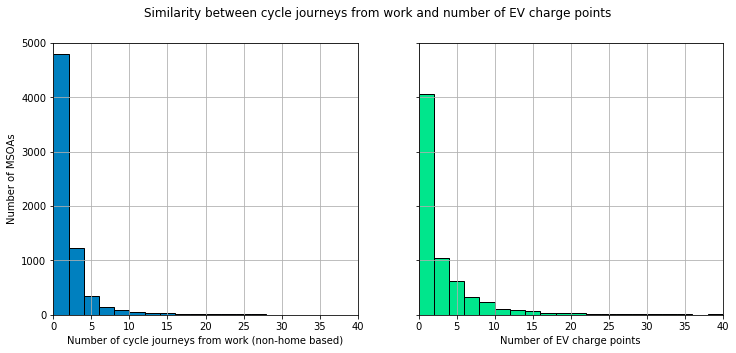

In [7]:
# Plotting feature most similar to target
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
df.cycle_from_work_nhb.hist(bins=np.linspace(
    0, 40, 21), ec='k', color=cm.winter(0.5), ax=ax[0])
df.charge_points.hist(bins=np.linspace(0, 40, 21), ec='k',
                      color=cm.winter(0.9), ax=ax[1])

# Cycle from work feature variable
ax[0].set_ylabel("Number of MSOAs")
ax[0].set_xlabel("Number of cycle journeys from work (non-home based)")
ax[0].set_xlim(0, 40)
ax[0].set_ylim(0, 5000)

# Charge points target variable
ax[1].set_xlim(0, 40)
ax[1].set_ylim(0, 5000)
ax[1].set_xlabel("Number of EV charge points")
plt.suptitle("Similarity between cycle journeys from work and number of EV charge points");

### Transformation of heavily skewed features

#### Socio-Economic Features

> - 8 out of the 15 socio-economic features were positively skewed. A 'box-cox' transformation was used for these variables to establish some normality. The remaining 7 variables were simply standardised with no transformation necessary as they had relatively normal distributions

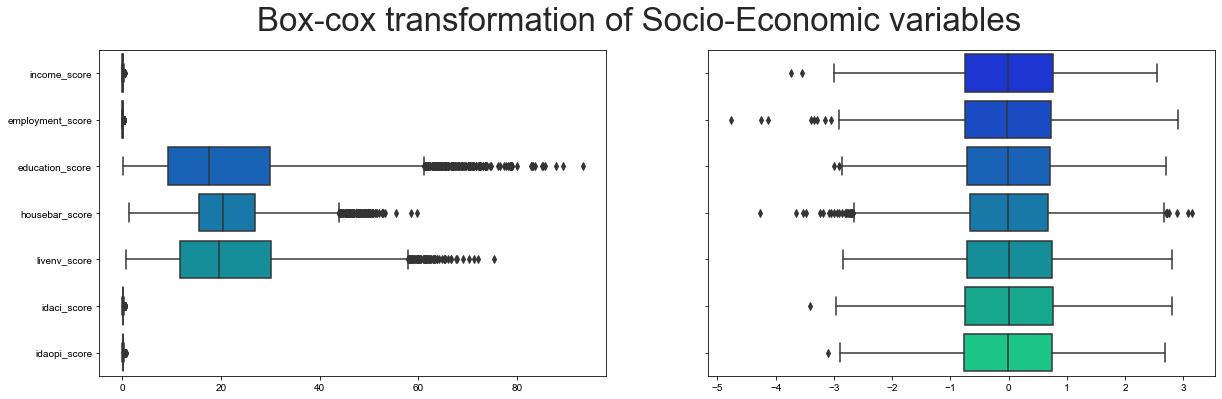

In [8]:
soc_econ1 = get_features(df,'income_score', 'adultskills_score', power=1, log=0, stand=0, remove=[
                         'health_score', 'crime_score', 'chanyp_score', 'adultskills_score'])

fig, ax = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
transform_and_plot(df,'income_score', 'adultskills_score', power=0, log=0, stand=0, remove=[
    'health_score', 'crime_score', 'chanyp_score', 'adultskills_score'], ax=ax[0])
transform_and_plot(df,'income_score', 'adultskills_score', power=1, log=0, stand=0, remove=[
    'health_score', 'crime_score', 'chanyp_score', 'adultskills_score'], ax=ax[1])

plt.suptitle("Box-cox transformation of Socio-Economic variables",fontsize=33)
plt.savefig("../reports/figures/eda_graphs/socio_econ1_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

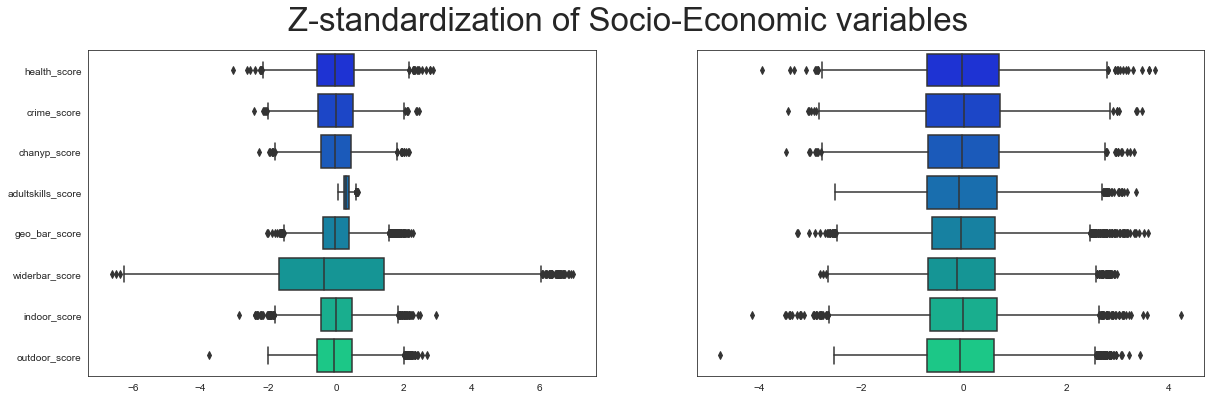

In [9]:
soc_econ2 = get_features(df,'health_score', 'outdoor_score', power=0, log=0, stand=0, remove=[
                         'housebar_score', 'livenv_score', 'idaci_score', 'idaopi_score'])

fig, ax = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
transform_and_plot(df,'health_score', 'outdoor_score', power=0, log=0, stand=0, remove=[
    'housebar_score', 'livenv_score', 'idaci_score', 'idaopi_score'], ax=ax[0])
transform_and_plot(df,'health_score', 'outdoor_score', power=0, log=0, stand=1, remove=[
    'housebar_score', 'livenv_score', 'idaci_score', 'idaopi_score'], ax=ax[1])

plt.suptitle("Z-standardization of Socio-Economic variables",fontsize=33)
plt.savefig("../reports/figures/eda_graphs/socio_econ2_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

#### Population & Income Features

> A logarithmic transformation was performed to compress primarily the income features. This was followed by a 'box-cox' power transformation to address the skewness and some outliers.

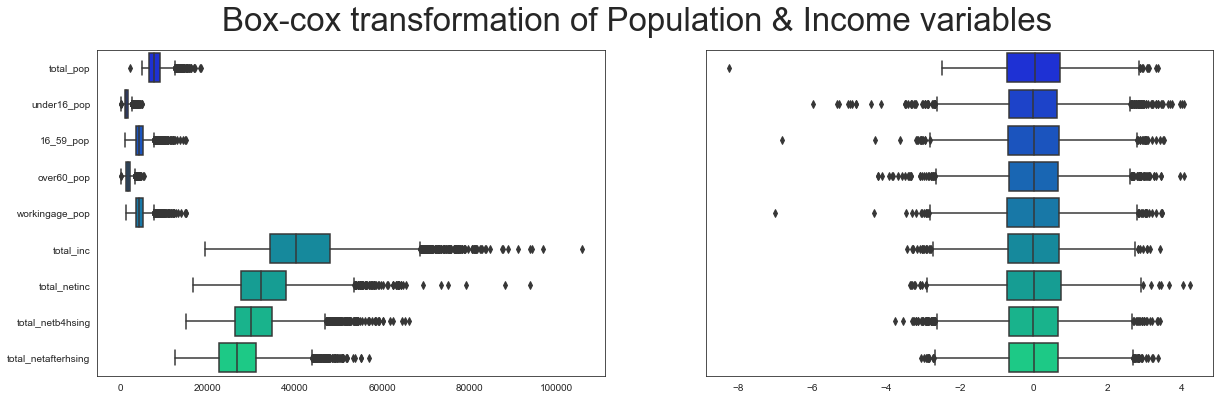

In [10]:
population = get_features(df,'total_pop', 'total_netafterhsing', power=1, log=1)

fig, ax = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
transform_and_plot(df,'total_pop', 'total_netafterhsing',
                   power=0, log=0, ax=ax[0])
transform_and_plot(df,'total_pop', 'total_netafterhsing',
                   power=1, log=1, ax=ax[1])

plt.suptitle("Box-cox transformation of Population & Income variables",fontsize=33)
plt.savefig("../reports/figures/eda_graphs/pop_income_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

#### Transportation Features

> In order to address zero values the features were aggregated together based on simulatrity to the mode of transportation. After aggregation a logarithmic transformation followed by a 'box-cox' power transformation was used to compress the figures and address the skewness and some outliers.

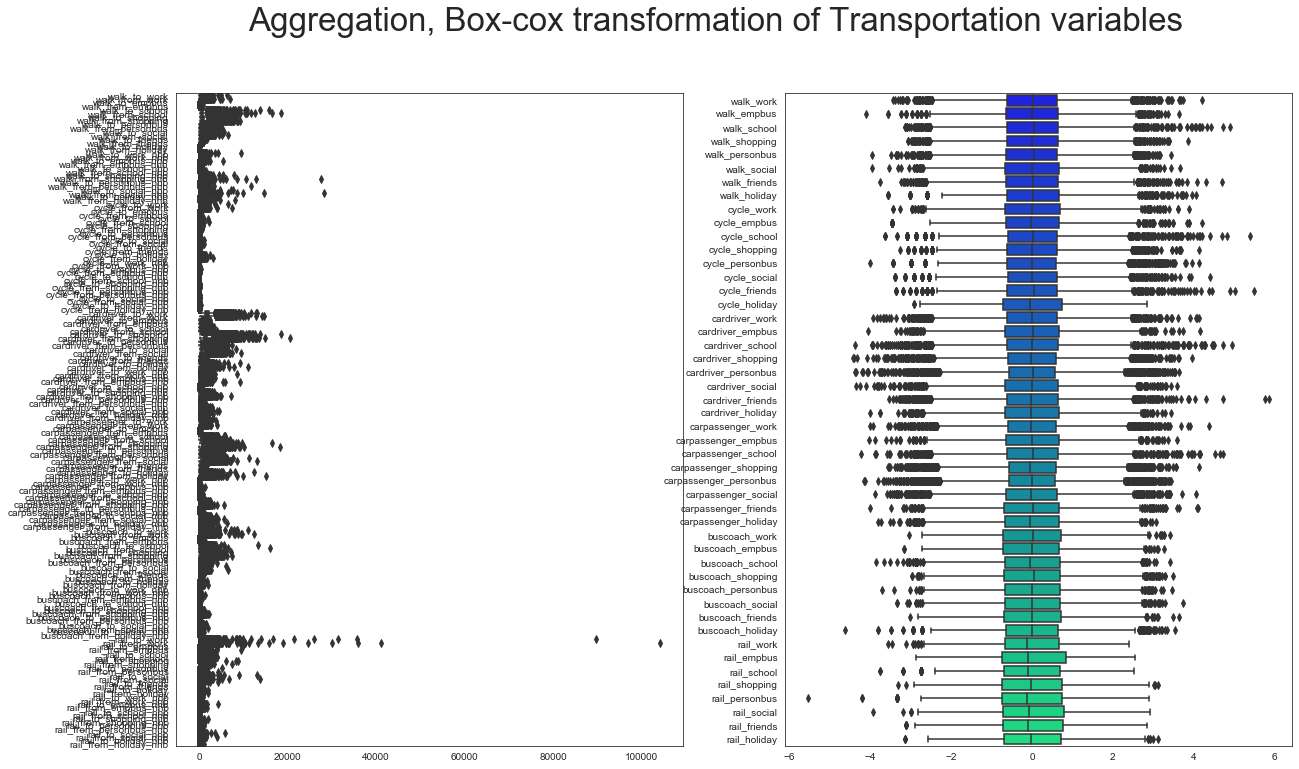

In [11]:
transport = get_features(df,
    'walk_to_work', 'rail_from_holiday_nhb', power=1, log=1, aggreg=1)

fig, ax = plt.subplots(1, 2, figsize=(20, 12), sharey=False)
transform_and_plot(df,'walk_to_work', 'rail_from_holiday_nhb',
                   power=0, log=0, aggreg=0, ax=ax[0])
transform_and_plot(df,'walk_to_work', 'rail_from_holiday_nhb',
                   power=1, log=1, aggreg=1, ax=ax[1])

plt.suptitle("Aggregation, Box-cox transformation of Transportation variables",fontsize=33)
plt.savefig("../reports/figures/eda_graphs/transport_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

#### Car Ownership & Registration Features

>A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

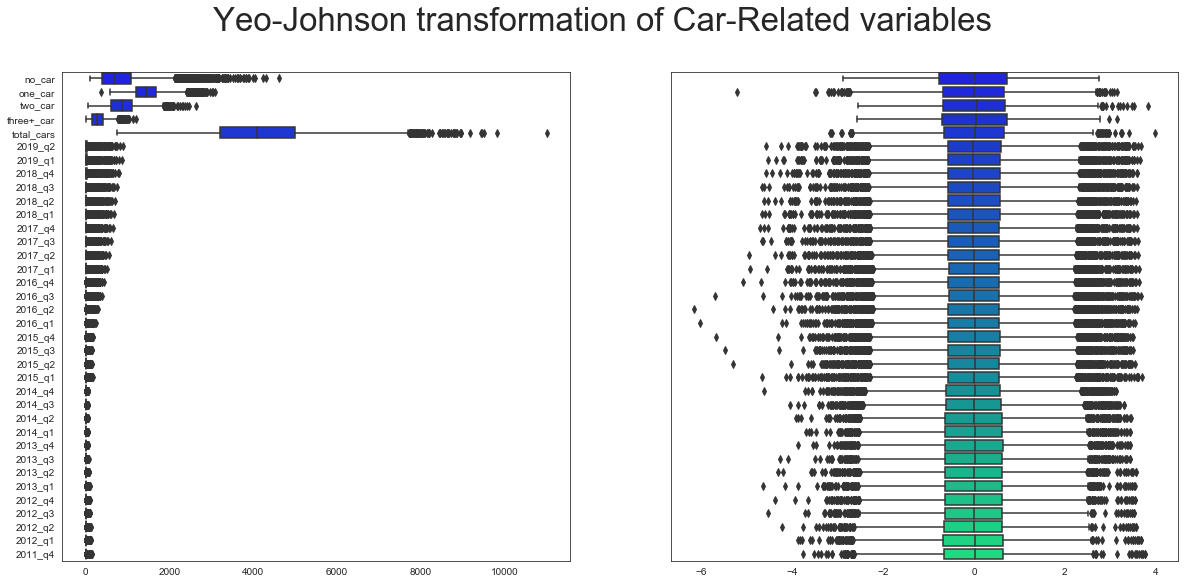

In [12]:
car_ownreg = get_features(df,'no_car', 'growth',
                          log=1, power=1, stand=0, remove=['two_car_tot', 'growth', 'two_car_frac'])

fig, ax = plt.subplots(1, 2, figsize=(20, 9), sharey=True)
transform_and_plot(df,'no_car', 'growth',
                   log=0, power=0, stand=0, remove=['two_car_tot', 'growth', 'two_car_frac'], ax=ax[0])
transform_and_plot(df,'no_car', 'growth',
                   log=1, power=1, stand=0, remove=['two_car_tot', 'growth', 'two_car_frac'], ax=ax[1])

plt.suptitle("Yeo-Johnson transformation of Car-Related variables",fontsize=33)
plt.savefig("../reports/figures/eda_graphs/car_ownreg_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

#### Geo-Spatial Features

> A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

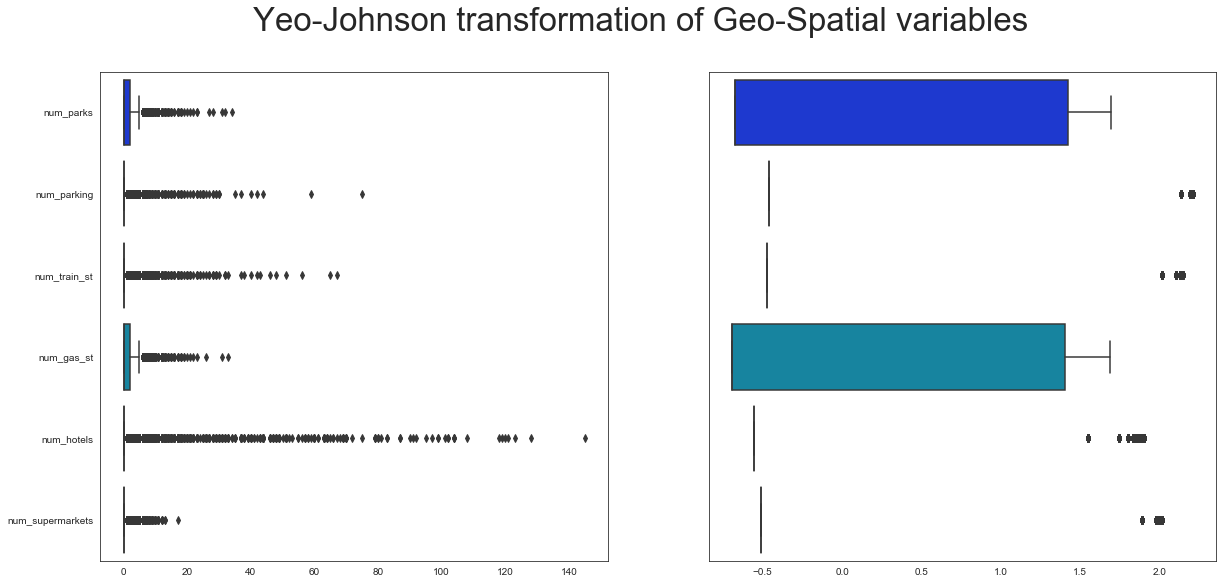

In [13]:
geo_spatial = get_features(df,'num_parks', 'st_lengthshape', power=1, log=1)

fig, ax = plt.subplots(1, 2, figsize=(20, 9), sharey=True)
transform_and_plot(df,'num_parks', 'num_supermarkets', power=0, log=0, ax=ax[0])
transform_and_plot(df,'num_parks', 'num_supermarkets', power=1, log=1, ax=ax[1])

plt.suptitle("Yeo-Johnson transformation of Geo-Spatial variables",fontsize=33)
plt.savefig("../reports/figures/eda_graphs/geo_spatial1_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

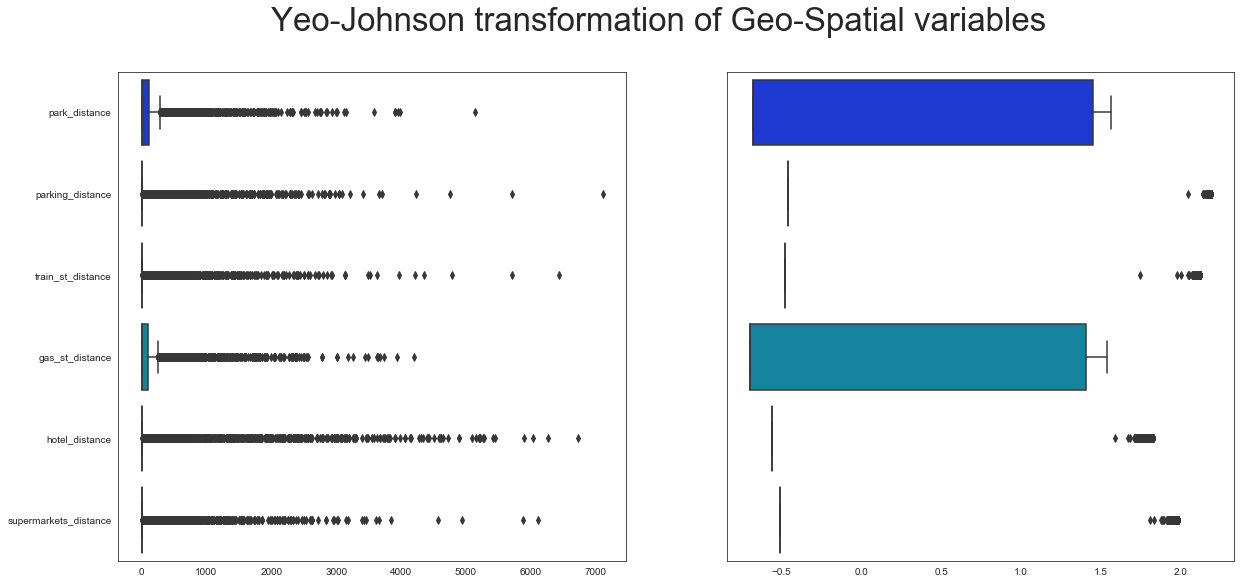

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 9), sharey=True)
transform_and_plot(df,'park_distance', 'supermarkets_distance', power=0, log=0, ax=ax[0])
transform_and_plot(df,'park_distance', 'supermarkets_distance', power=1, log=1, ax=ax[1])

plt.suptitle("Yeo-Johnson transformation of Geo-Spatial variables",fontsize=33)
plt.savefig("../reports/figures/eda_graphs/geo_spatial2_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

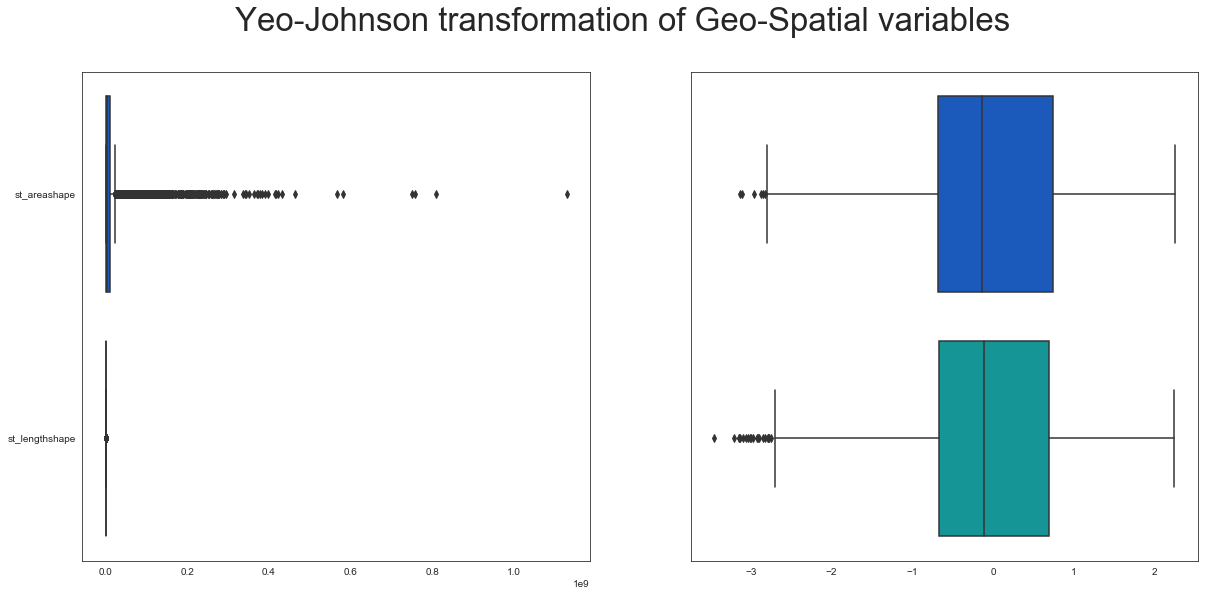

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 9), sharey=True)
transform_and_plot(df,'st_areashape', 'st_lengthshape', power=0, log=0, ax=ax[0])
transform_and_plot(df,'st_areashape', 'st_lengthshape', power=1, log=1, ax=ax[1])

plt.suptitle("Yeo-Johnson transformation of Geo-Spatial variables",fontsize=33)
plt.savefig("../reports/figures/eda_graphs/geo_spatial3_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

#### Electricity Consumption Features

> A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

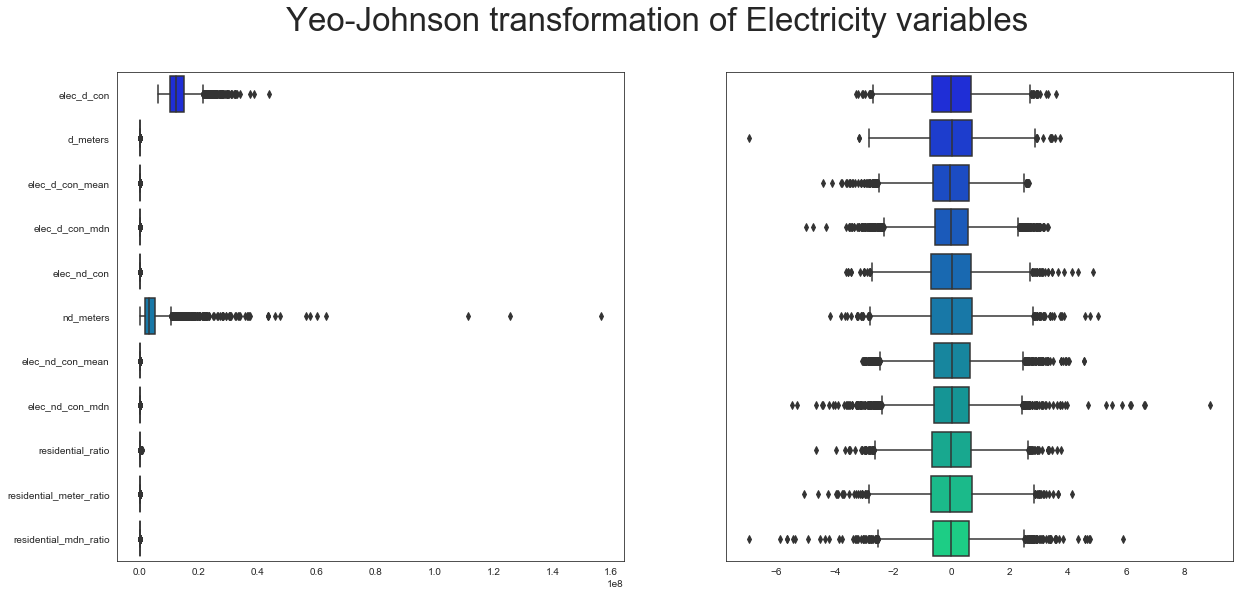

In [16]:
electricity = get_features(df,
    'elec_d_con', 'residential_mdn_ratio', power=1, log=1)

fig, ax = plt.subplots(1, 2, figsize=(20, 9), sharey=True)
transform_and_plot(df,'elec_d_con', 'residential_mdn_ratio',
                   power=0, log=0, ax=ax[0])
transform_and_plot(df,'elec_d_con', 'residential_mdn_ratio',
                   power=1, log=1, ax=ax[1])

plt.suptitle("Yeo-Johnson transformation of Electricity variables",fontsize=33)
plt.savefig("../reports/figures/eda_graphs/electricity_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

In [17]:
#Creating both cubic transformation and logarithmic transformation of target variable
df['charge_pt_cbrt'] = np.cbrt(df.charge_points)
df['charge_pt_log'] = np.log1p(df.charge_points)

metropol = df.loc[:, 'metropolitan':]

#Creating fully transformed dataframe including the target variable
trans_df = pd.concat([soc_econ1, soc_econ2, population,transport,car_ownreg,geo_spatial,electricity,metropol], axis=1)

trans_df.head()

,income_score,employment_score,education_score,housebar_score,livenv_score,idaci_score,idaopi_score,health_score,crime_score,chanyp_score,...,nd_meters,elec_nd_con_mean,elec_nd_con_mdn,residential_ratio,residential_meter_ratio,residential_mdn_ratio,metropolitan,charge_points,charge_pt_cbrt,charge_pt_log
0,0.088871,-0.328150,-0.807968,0.445443,1.824076,0.866820,1.465212,0.3630,0.80880,-0.04220,...,0.197921,-2.841671,-2.338393,-1.257011,0.162572,1.235550,1,1.0,1.0,0.693147
1,0.900348,0.866787,0.959446,0.586226,-0.709900,0.582644,0.953194,0.7670,0.68000,0.51950,...,-0.143319,-0.200073,-0.517636,-0.544830,-0.100296,0.118798,0,0.0,0.0,0.000000
2,-0.007405,0.211704,0.189744,0.007621,1.260961,0.207690,-0.513265,-0.0575,0.65925,-0.19225,...,-0.332959,1.274794,1.292622,0.339985,0.095846,-1.692076,1,0.0,0.0,0.000000
3,1.040667,1.380963,1.693272,0.186107,-1.075471,1.107423,0.396439,0.7454,0.17780,1.23600,...,-0.535777,2.636012,1.338312,1.087951,0.655943,-1.574221,0,0.0,0.0,0.000000
4,1.685602,1.808018,1.254968,-1.863149,0.323616,1.718330,1.433688,1.7044,-0.06740,0.81980,...,-1.263597,-0.004359,0.586896,1.333457,1.292716,-1.029627,1,0.0,0.0,0.000000


### Correlation of Features with Target variable

#### SocioEconomic Feature correlations
> ***Very weak correlation of socio-economic features with the number of EV charge points in a MSOA***

|                |   charge_points |   charge_pt_cbrt |   charge_pt_log |
|----------------|-----------------|------------------|-----------------|
| workingage_pop |           0.223 |            0.252 |           0.26  |
| 16_59_pop      |           0.22  |            0.247 |           0.255 |
| widerbar_score |           0.191 |            0.187 |           0.196 |
| outdoor_score  |           0.185 |            0.157 |           0.169 |
| housebar_score |           0.163 |            0.206 |           0.205 |
| total_pop      |           0.16  |            0.203 |           0.208 |

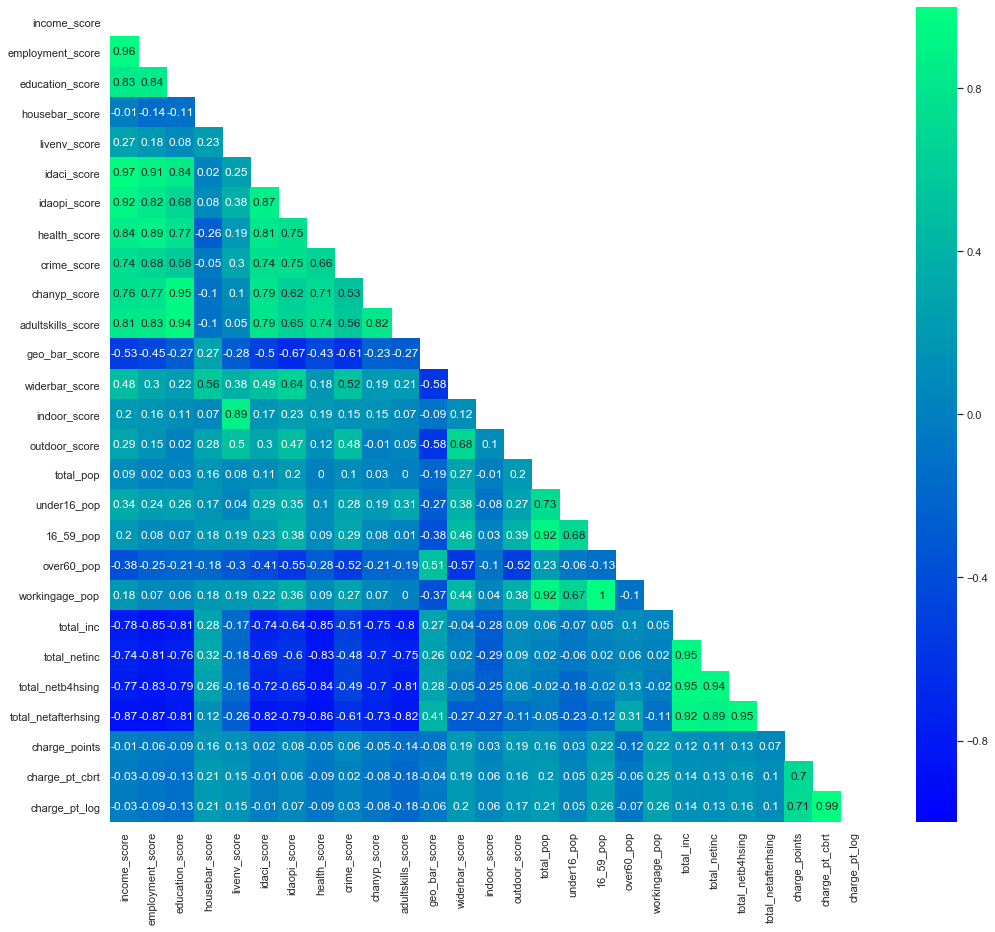

In [18]:
#Plotting collinearity
sns.set(font_scale=1)
sns.set_style("white")
soc_econ_list = trans_df.loc[:, 'income_score':'total_netafterhsing'].columns
targets_list = ['charge_points', 'charge_pt_cbrt', 'charge_pt_log']

fig, ax = plt.subplots(figsize=(17, 15))
the_plot = just_plot(trans_df,ax,soc_econ_list, targets_list)
plt.ylim(27, 0)
plt.savefig("../reports/figures/correlations/socio_econ_correlation.jpg",
            dpi=144, quality=100, bbox_inches='tight')
plt.show()

#### Transportation Feature correlations
There was a mildly weak correlation of transportation features with the number of EV charge points in a MSOA

>***Large numbers of EV charge points in an area may occur where there is higher weekday number of journeys:***
1. to employers business regardless of transportation mode in the respective area
2. to recreational events regardless of transportation mode in the respective area
3. to work by walking, cycling, driving or bus in the respective area
4. by rail to shopping in the respective area

**Walking**

|             |   charge_points |   charge_pt_cbrt |   charge_pt_log |
|-------------|-----------------|------------------|-----------------|
| walk_empbus |           0.299 |            0.37  |           0.377 |
| walk_social |           0.272 |            0.34  |           0.345 |
| walk_work   |           0.255 |            0.291 |           0.299 |

**Cycling**

|              |   charge_points |   charge_pt_cbrt |   charge_pt_log |
|--------------|-----------------|------------------|-----------------|
| cycle_empbus |           0.319 |            0.388 |           0.397 |
| cycle_social |           0.314 |            0.398 |           0.402 |
| cycle_work   |           0.295 |            0.365 |           0.371 |

**Driving**

|                  |   charge_points |   charge_pt_cbrt |   charge_pt_log |
|------------------|-----------------|------------------|-----------------|
| cardriver_empbus |           0.297 |            0.412 |           0.409 |
| cardriver_work   |           0.232 |            0.312 |           0.309 |
| cardriver_social |           0.222 |            0.303 |           0.301 |

**Carpooling**

|                     |   charge_points |   charge_pt_cbrt |   charge_pt_log |
|---------------------|-----------------|------------------|-----------------|
| carpassenger_empbus |           0.306 |            0.422 |           0.421 |
| carpassenger_work   |           0.176 |            0.234 |           0.231 |
| carpassenger_social |           0.158 |            0.221 |           0.217 |

**Bus**

|                 |   charge_points |   charge_pt_cbrt |   charge_pt_log |
|-----------------|-----------------|------------------|-----------------|
| buscoach_empbus |           0.302 |            0.337 |           0.348 |
| buscoach_social |           0.299 |            0.337 |           0.347 |
| buscoach_work   |           0.285 |            0.294 |           0.307 |

**Rail**

|               |   charge_points |   charge_pt_cbrt |   charge_pt_log |
|---------------|-----------------|------------------|-----------------|
| rail_empbus   |           0.322 |            0.406 |           0.414 |
| rail_social   |           0.318 |            0.388 |           0.398 |
| rail_shopping |           0.316 |            0.378 |           0.388 |

In [19]:
# Importing project specific functions
%run "../src/functions/functions_for_project.py"

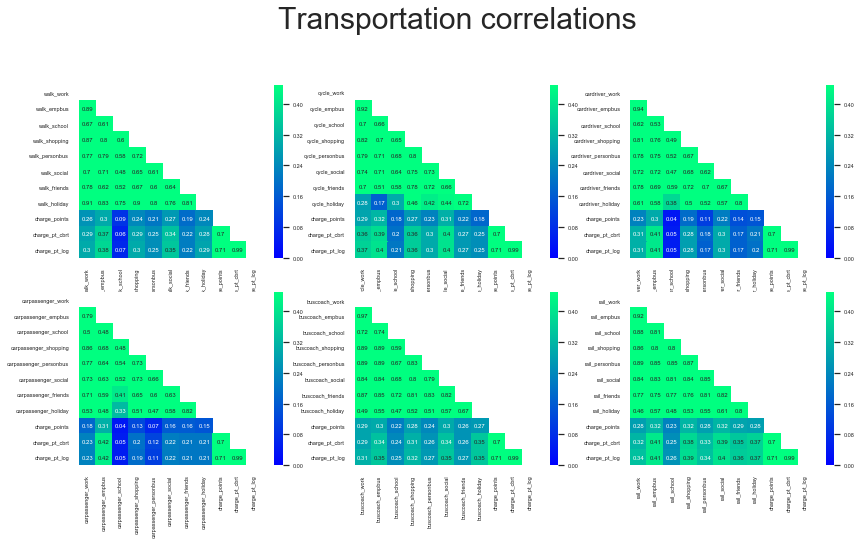

In [20]:
#Plotting collinearity
sns.set(font_scale=0.5)
sns.set_style("white")
targets_list = ['charge_points', 'charge_pt_cbrt', 'charge_pt_log']
mode = ['walk', 'cycle', 'cardriver', 'carpassenger', 'buscoach', 'rail']

fig, ax = plt.subplots(2,3,figsize=(14,7))

chart = {0:(0,0),1:(0,1),2:(0,2),3:(1,0),4:(1,1),5:(1,2)}

for num, x in enumerate(mode):
    transp_list = trans_df.loc[:, f'{x}_work':f'{x}_holiday'].columns
    the_plot = just_plot(trans_df,ax[chart[num]],transp_list, targets_list,vmin=0,vmax=0.45)
    ax[chart[num]].set_ylim(11, 0)

    
plt.suptitle("Transportation correlations",fontsize=30,va='bottom')

plt.savefig(f"../reports/figures/correlations/transport_correlation.jpg",
            dpi=144, quality=100, bbox_inches='tight')    
plt.show()

In [21]:
#mode = ['walk', 'cycle', 'cardriver', 'carpassenger', 'buscoach', 'rail']

#for num, x in enumerate(mode):
#    transp_list = trans_df.loc[:, f'{x}_work':f'{x}_holiday'].columns
#    make_markdown_table(transp_list, targets_list, 3)

#### Car Ownership Feature correlations

|            |   charge_points |   charge_pt_cbrt |   charge_pt_log |
|------------|-----------------|------------------|-----------------|
| no_car     |           0.181 |            0.18  |           0.19  |
| three_car |          -0.117 |           -0.08  |          -0.091 |
| 2011_q4    |           0.117 |            0.151 |           0.153 |
| two_car    |          -0.116 |           -0.08  |          -0.089 |
| 2012_q1    |           0.112 |            0.147 |           0.148 |

> ***Very weak correlation of car ownership features with the number of EV charge points in a MSOA***

In [22]:
#make_markdown_table(cars_list, targets_list,5)

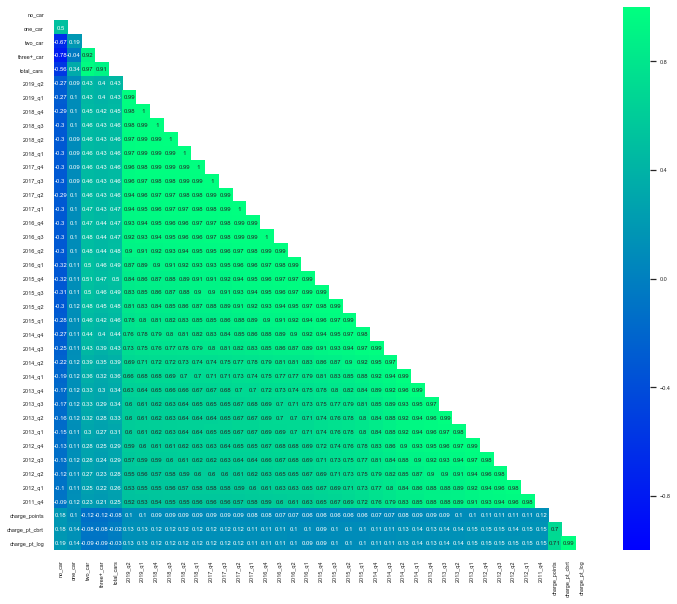

In [23]:
#Plotting collinearity
sns.set(font_scale=0.5)
sns.set_style("white")
cars_list = trans_df.loc[:, 'no_car':'2011_q4'].columns
targets_list = ['charge_points', 'charge_pt_cbrt', 'charge_pt_log']

fig, ax = plt.subplots(figsize=(12, 10))
the_plot = just_plot(trans_df,ax,cars_list, targets_list)
plt.ylim(39, 0)
plt.savefig("../reports/figures/correlations/car_pop_correlation.jpg",
            dpi=144, quality=100, bbox_inches='tight')
plt.show()

#### Geo-Spatial Feature correlations
> ***Very weak correlation of geo-spatial features with the number of EV charge points in a MSOA***

|                   |   charge_points |   charge_pt_cbrt |   charge_pt_log |
|-------------------|-----------------|------------------|-----------------|
| num_train_st      |           0.215 |            0.23  |           0.235 |
| train_st_distance |           0.213 |            0.228 |           0.233 |
| num_parking       |           0.212 |            0.238 |           0.241 |
| parking_distance  |           0.21  |            0.236 |           0.24  |
| num_gas_st        |           0.155 |            0.17  |           0.175 |

In [24]:
#make_markdown_table(geo_list, targets_list,5)

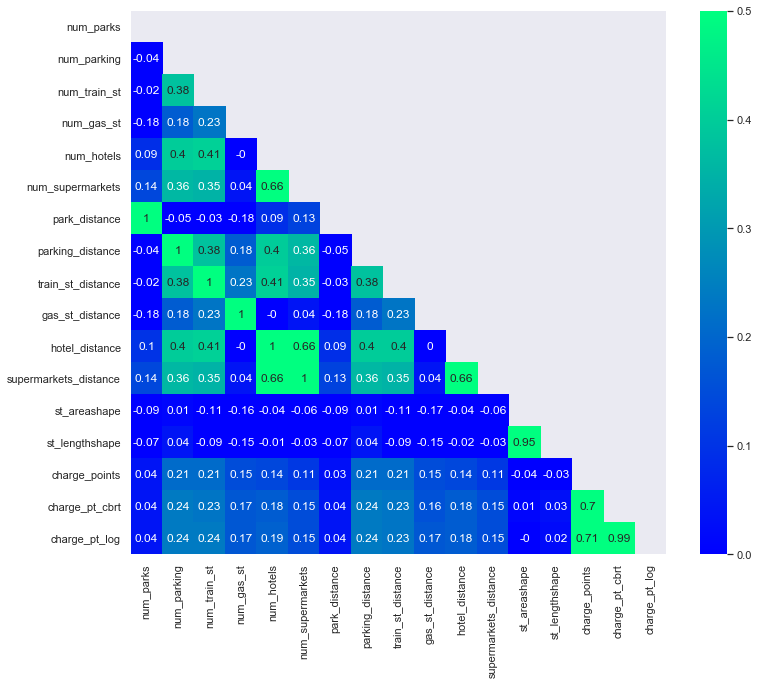

In [25]:
#Plotting collinearity
sns.set(font_scale=1)
geo_list = trans_df.loc[:, 'num_parks':'st_lengthshape'].columns
targets_list = ['charge_points', 'charge_pt_cbrt', 'charge_pt_log']

fig, ax = plt.subplots(figsize=(12, 10))
the_plot = just_plot(trans_df,ax,geo_list, targets_list,vmin=0,vmax=0.5)
plt.ylim(17, 0)
plt.savefig("../reports/figures/correlations/geo_spatial_correlation.jpg",
            dpi=144, quality=100, bbox_inches='tight')
plt.show()

#### Electricity Consumption Feature correlations
>***Large numbers of EV charge points in an area may occur where there is:***
1. high 2018 non-domestic electricity consumption in the respective area
2. high number of non-domestic electricity meters in the respective area

|                         |   charge_points |   charge_pt_cbrt |   charge_pt_log |
|-------------------------|-----------------|------------------|-----------------|
| nd_meters               |           0.322 |            0.45  |           0.447 |
| elec_nd_con             |           0.309 |            0.442 |           0.439 |
| residential_meter_ratio |          -0.293 |           -0.417 |          -0.413 |
| residential_ratio       |          -0.281 |           -0.41  |          -0.407 |
| d_meters                |           0.195 |            0.252 |           0.253 |
| elec_d_con              |           0.174 |            0.246 |           0.242 |

In [26]:
#make_markdown_table(electricity_list, targets_list,6)

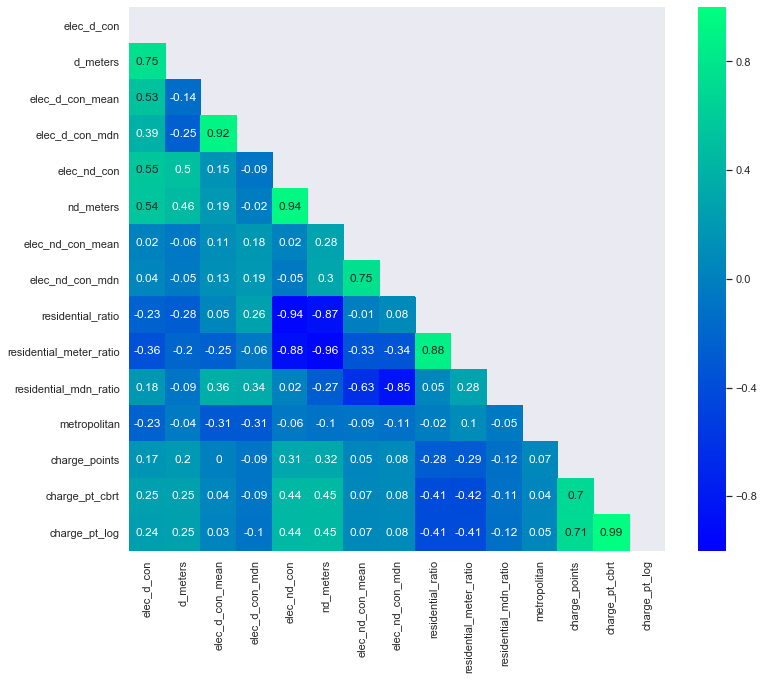

In [27]:
#Plotting collinearity
sns.set(font_scale=1)
electricity_list = trans_df.loc[:, 'elec_d_con':'metropolitan'].columns
targets_list = ['charge_points', 'charge_pt_cbrt', 'charge_pt_log']

fig, ax = plt.subplots(figsize=(12, 10))
the_plot = just_plot(trans_df,ax,electricity_list, targets_list,vmin=-1,vmax=1)
plt.ylim(15, 0)
plt.savefig("../reports/figures/correlations/electricity_correlation.jpg",
            dpi=144, quality=100, bbox_inches='tight')
plt.show()

In [28]:

def create_feat_list(n_feat):
    '''Function creates a feature list of the top (n) number of correlated features with the target variable'''
    feat_list = []
    
    #socio-econ
    soc_econ_list = trans_df.loc[:, 'income_score':'total_netafterhsing'].columns
    feat_list.extend(search_corr(trans_df,soc_econ_list, targets_list,n_feat).index)

    #transportation
    mode = ['walk', 'cycle', 'cardriver', 'carpassenger', 'buscoach', 'rail']

    for num, x in enumerate(mode):
        transp_list = trans_df.loc[:, f'{x}_work':f'{x}_holiday'].columns
        #print(transp_list)
        #print(search_corr(transp_list, targets_list,55).index)
        feat_list.extend(search_corr(trans_df,transp_list, targets_list,n_feat).index)

    #car ownership
    cars_list = trans_df.loc[:, 'no_car':'2011_q4'].columns
    feat_list.extend(search_corr(trans_df,cars_list, targets_list,n_feat).index)
    
    #geo-spatial
    geo_list = trans_df.loc[:, 'num_parks':'st_lengthshape'].columns
    feat_list.extend(search_corr(trans_df,geo_list, targets_list,n_feat).index)
    
    #electricity
    electricity_list = trans_df.loc[:, 'elec_d_con':'metropolitan'].columns
    feat_list.extend(search_corr(trans_df,electricity_list, targets_list,n_feat).index)
    
    return feat_list

In [29]:
feat_list = create_feat_list(2)

In [30]:
make_markdown_table(trans_df,feat_list,targets_list,19)

|                     |   charge_points |   charge_pt_cbrt |   charge_pt_log |
|---------------------|-----------------|------------------|-----------------|
| rail_empbus         |           0.322 |            0.406 |           0.414 |
| nd_meters           |           0.322 |            0.45  |           0.447 |
| cycle_empbus        |           0.319 |            0.388 |           0.397 |
| rail_social         |           0.318 |            0.388 |           0.398 |
| cycle_social        |           0.314 |            0.398 |           0.402 |
| elec_nd_con         |           0.309 |            0.442 |           0.439 |
| carpassenger_empbus |           0.306 |            0.422 |           0.421 |
| buscoach_empbus     |           0.302 |            0.337 |           0.348 |
| walk_empbus         |           0.299 |            0.37  |           0.377 |
| buscoach_social     |           0.299 |            0.337 |           0.347 |
| cardriver_empbus    |           0.297 |           

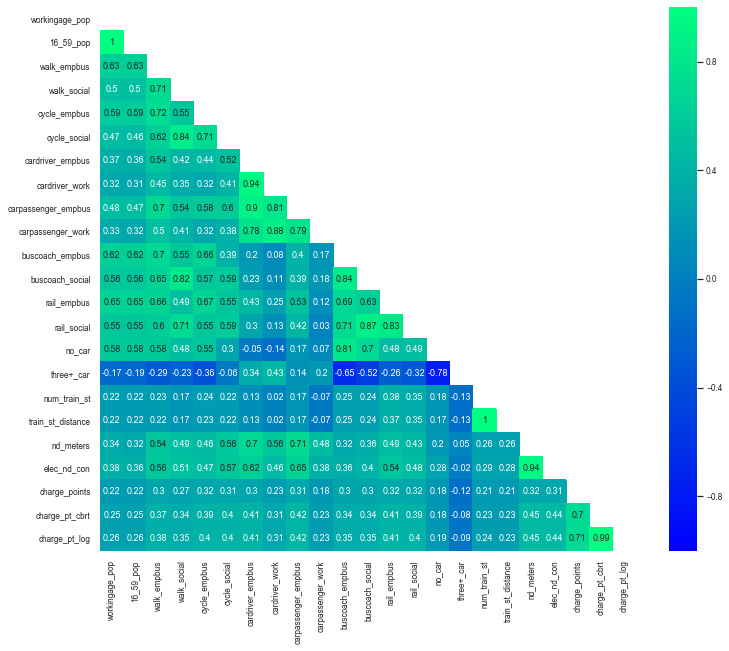

In [31]:
sns.set(font_scale=0.75)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,10))
just_plot(trans_df,ax,feat_list, targets_list)
plt.ylim(23,0)
plt.savefig("../reports/figures/correlations/most_correlated.jpg",dpi=288,quality=100,bbox_inches='tight')
plt.show()#"EVcorrheatmap.jpg")

### Collinearity amongst Features

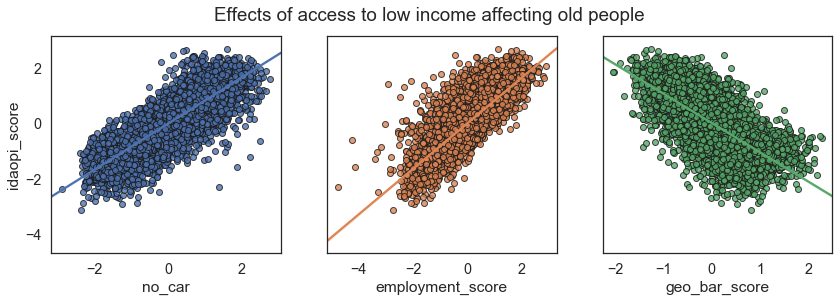

In [38]:
sns.set(font_scale=1.3)
sns.set_style("white")
fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharey=True)
sns.regplot('no_car',
            'idaopi_score',
            data=trans_df,
            order=1,
            ax=ax[0],
            scatter_kws={'ec': 'k'})
sns.regplot('employment_score',
            'idaopi_score',
            data=trans_df,
            order=1,
            ax=ax[1],
            scatter_kws={'ec': 'k'})
sns.regplot('geo_bar_score',
            'idaopi_score',
            data=trans_df,
            order=1,
            ax=ax[2],
            scatter_kws={'ec': 'k'})
ax[1].set_ylabel("")
ax[2].set_ylabel("")
plt.suptitle("Effects of access to low income affecting old people")
plt.savefig("../reports/figures/correlations/idaopi_correlation.jpg",
            dpi=144,
            quality=100,
            bbox_inches='tight')

**The higher the proportion of the population experiencing deprivation relating to low income which affects old people:**
1. the higher the proportion of the population that has no car
2. the higher the proportion of the working-age population in an area involuntarily excluded from the labour market
3. The easier it is to access housing and local services(financially & physically) because of physical proximity

> ***`low income affecting old people` may have effects on car ownership and unemployment rate in an area***

In [ ]:
msoa_uk = load_geojson("../data/raw/geo_spatial/Middle_Layer_Super_Output_Areas_December_2011_Boundaries_EW_BFC_simple.geojson")

In [ ]:
#Function to extract centroids from polygons and multipolygons
def centroid_calc(x):
    if x['geometry.type'] == "Polygon":
        lat = Polygon(x['geometry.coordinates'][0]).centroid.xy[1][0]
        long = Polygon(x['geometry.coordinates'][0]).centroid.xy[0][0]
        return lat,long
    else:
        
        lat = Polygon(x['geometry.coordinates'][0][0]).centroid.xy[1][0]
        long = Polygon(x['geometry.coordinates'][0][0]).centroid.xy[0][0]
        
        return lat,long
    


In [ ]:
msoa_uk = pd.merge(df.iloc[:,:4].join(trans_df),msoa_uk,left_on='msoa11cd',right_on='properties.msoa11cd')

In [ ]:
msoa_uk.head(1)

In [ ]:
def plot_area(*args):
    try:
        search_area = msoa_uk[msoa_uk['properties.msoa11nm'].str.contains('|'.join(args))]
        search_area_json = df_to_geojson(search_area,['properties.msoa11cd','properties.msoa11nm','properties.objectid','properties.st_areashape','properties.st_lengthshape'])
        with open('../data/processed/search.geojson', 'w') as json_file:
            json.dump(search_area_json, json_file)

        start_lat = search_area.apply(centroid_calc,axis=1).apply(lambda x : x[0]).mean()
        start_lon = search_area.apply(centroid_calc,axis=1).apply(lambda x : x[1]).mean()

        area_map = folium.Map(location=(start_lat,start_lon),zoom_start=12)

        area_map.choropleth(geo_data='../data/processed/search.geojson',data=search_area,columns=["properties.msoa11cd","cardriver_empbus"],
                          key_on='feature.properties.msoa11cd',fill_color='Spectral',highlight=True,name="areas")
        
        msoa_centroids = folium.FeatureGroup(name='centroids').add_to(area_map)
        
#         for name,(lat,lon) in zip(search_area['properties.msoa11nm'],search_area[['geometry.type','geometry.coordinates']].apply(centroid_calc,axis=1)):
#                 text = folium.Popup(name,parse_html=True)
#                 folium.Circle(location=(lat,lon),popup=text,color='black',fill=True,fill_color="black",fill_opacity=1).add_to(msoa_centroids)
            
            
            
        folium.LayerControl().add_to(area_map)
        area_map.save("../data/processed/search.html")
        
        return area_map
        
        
    except:
        print("This is not a council area in London")
        print(zip(search_area['properties.msoa11nm'],search_area[['geometry.type','geometry.coordinates']].apply(centroid_calc,axis=1)))

In [ ]:
search_area = msoa_uk[msoa_uk['properties.msoa11nm'].str.contains('Manchester')]
#search_area
#search_area.apply(centroid_calc,axis=1).apply(lambda x : x[0])

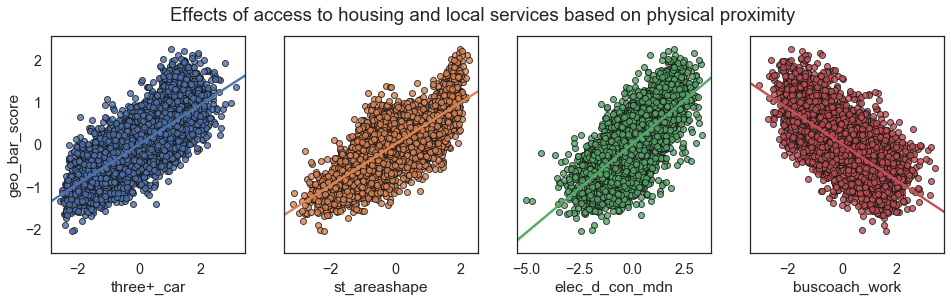

In [39]:
fig, ax = plt.subplots(1,4,figsize=(16,4),sharey=True)
sns.regplot('three+_car','geo_bar_score', data=trans_df, order=1,ax=ax[0],scatter_kws={'ec':'k'})
sns.regplot('st_areashape','geo_bar_score', data=trans_df, order=1,ax=ax[1],scatter_kws={'ec':'k'})
sns.regplot('elec_d_con_mdn','geo_bar_score', data=trans_df, order=1,ax=ax[2],scatter_kws={'ec':'k'})
sns.regplot('buscoach_work','geo_bar_score', data=trans_df, order=1,ax=ax[3],scatter_kws={'ec':'k'});
ax[1].set_ylabel("")
ax[2].set_ylabel("")
ax[3].set_ylabel("")
plt.suptitle("Effects of access to housing and local services based on physical proximity")
plt.savefig("../reports/figures/correlations/geo_bar_correlation.jpg",
            dpi=144,
            quality=100,
            bbox_inches='tight');

**The harder it is to access housing and local services because of physical proximity to those services in an area**:

1. the higher the number of people who own 3+ cars
2. the larger the geographic area in square meters
3. the higher the median 2018 domestic electricity consumption in the area
4. the lower the weekday number of journeys done by bus/coach to work

> ***`Access to housing and local services` may be a variable that is speaking about the differences between urban and rural areas***

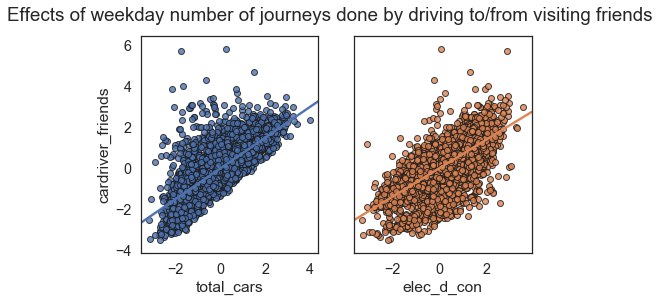

In [40]:
fig, ax = plt.subplots(1,2,figsize=(7,4),sharey=True)
sns.regplot('total_cars','cardriver_friends', data=trans_df, order=1,ax=ax[0],scatter_kws={'ec':'k'})
sns.regplot('elec_d_con','cardriver_friends', data=trans_df, order=1,ax=ax[1],scatter_kws={'ec':'k'})
ax[1].set_ylabel("")
plt.suptitle("Effects of weekday number of journeys done by driving to/from visiting friends")
plt.savefig("../reports/figures/correlations/cardriver_friends_correlation.jpg",
            dpi=144,
            quality=100,
            bbox_inches='tight');

**The higher the weekday number of journeys done by driving to/from visiting friends**:

1. the higher the number of cars owned in the area
2. the higher the 2018 domestic electricity consumption in the area

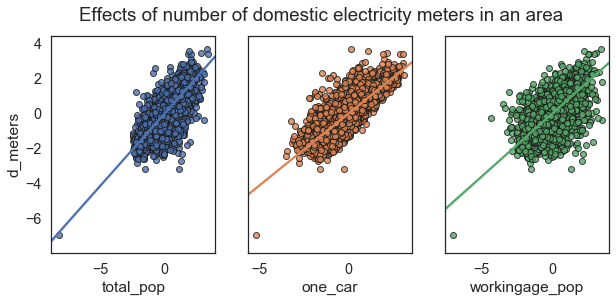

In [41]:
fig, ax = plt.subplots(1,3,figsize=(10,4),sharey=True)
sns.regplot('total_pop','d_meters', data=trans_df, order=1,ax=ax[0],scatter_kws={'ec':'k'})
sns.regplot('one_car','d_meters', data=trans_df, order=1,ax=ax[1],scatter_kws={'ec':'k'})
sns.regplot('workingage_pop','d_meters', data=trans_df, order=1,ax=ax[2],scatter_kws={'ec':'k'})
ax[1].set_ylabel("")
ax[2].set_ylabel("")
plt.suptitle("Effects of number of domestic electricity meters in an area")
plt.savefig("../reports/figures/correlations/d_meters_correlation.jpg",
            dpi=144,
            quality=100,
            bbox_inches='tight');

**The higher the number of domestic electricity meters in an area**:

1. the higher the number of people who own 1 car in the area
2. the higher the working age population size in the area
3. the higher the total population size in the area

> ***This may be speaking to a more population dense area on the high end and a sparse population density on the lower end***

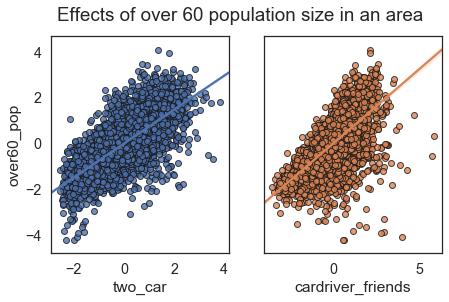

In [45]:
fig, ax = plt.subplots(1,2,figsize=(7,4),sharey=True)

sns.regplot('two_car','over60_pop', data=trans_df, order=1,ax=ax[0],scatter_kws={'ec':'k'})
sns.regplot('cardriver_friends','over60_pop', data=trans_df, order=1,ax=ax[1],scatter_kws={'ec':'k'})
ax[1].set_ylabel("")
plt.suptitle("Effects of over 60 population size in an area")
plt.savefig("../reports/figures/correlations/over60_correlation.jpg",
            dpi=144,
            quality=100,
            bbox_inches='tight');

**The higher the over 60 population size:**
1. the higher number of people who own 2 cars
2. the higher the weekday number of journeys done by driving to visit friends

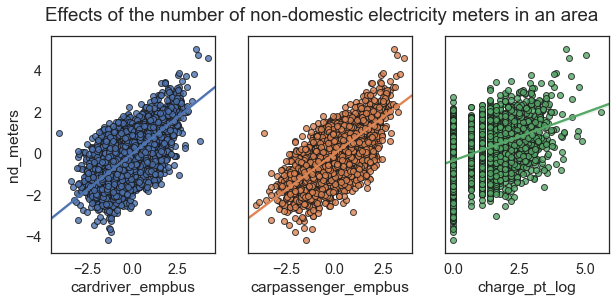

In [44]:
fig, ax = plt.subplots(1,3,figsize=(10,4),sharey=True)
sns.regplot('cardriver_empbus','nd_meters', data=trans_df, order=1,ax=ax[0],scatter_kws={'ec':'k'})
sns.regplot('carpassenger_empbus','nd_meters', data=trans_df, order=1,ax=ax[1],scatter_kws={'ec':'k'})
sns.regplot('charge_pt_log','nd_meters', data=trans_df, order=1,ax=ax[2],scatter_kws={'ec':'k'})
ax[1].set_ylabel("")
ax[2].set_ylabel("")
plt.suptitle("Effects of the number of non-domestic electricity meters in an area")
plt.savefig("../reports/figures/correlations/nd_meters_correlation.jpg",
            dpi=144,
            quality=100,
            bbox_inches='tight');

**The higher the number of non-domestic electricity meters in an area**:

1. the higher the weekday number of journeys done by driving to/from employers business in the area
2. the higher the weekday number of journeys done by car pooling to/from employers business in the area
3. the higher the number of charge points in the area

> ***This may be speaking to a more industrial/commercial zone where people use their cars to conduct business***

In [ ]:
EV_britain().description['charge_points']

In [ ]:
trans_df.drop(['charge_pt_log', 'charge_pt_cbrt',
               'charge_points'], axis=1).shape

In [ ]:
trans_df

In [ ]:
#Preparing features for a PCA analysis
pd.set_option('display.max_columns', 5000)
trans_df = trans_df.dropna()
X = trans_df.drop(['charge_pt_log', 'charge_pt_cbrt', 'charge_points'], axis=1)
y = trans_df.charge_pt_log.values
X.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca_df = pca.fit(X)

In [ ]:
#Plotting the scree plot
fig, ax = plt.subplots(1,2,figsize=(18,6))
sns.set(font='sans-serif', font_scale=1.3,style='darkgrid')
sns.lineplot(data=pca_df.explained_variance_ratio_,ax=ax[0])
ax[0].set_xlabel("Number of components")
ax[0].set_ylabel("% of variance explained")

sns.lineplot(data=pca_df.explained_variance_ratio_.cumsum(),ax=ax[1])
ax[1].set_xlabel("Number of components")
ax[1].set_ylabel("% of variance explained");

In [ ]:
#Note that 60 components explain almost all the variance in the data
# Comfirming the reduction of the components collinearity

In [ ]:
comp_num = 60
pca = PCA(comp_num)
pca_df = pd.DataFrame(pca.fit_transform(X),columns=["PC_"+str(x) for x in range(1,comp_num+1)])
sns.heatmap(pca_df.corr());

In [ ]:
y = pd.Series(y).map(lambda x : 1 if x>0 else 0)

In [ ]:
pca_df

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression(solver='liblinear')
y = pd.Series(y).map(lambda x : 1 if x>0 else 0)
model.fit(pca_df, y)

model.score(pca_df, y)
# pd.DataFrame(model.coef_, index=pca_df.columns, columns=['coef']).apply(
#     lambda x: abs(x)).sort_values(by='coef', ascending=False).head(60)

In [ ]:
y.value_counts(normalize=True)

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
pd.set_option('display.max_columns', 5000)
trans_df = trans_df.dropna()
X = trans_df.drop(['charge_pt_log', 'charge_pt_cbrt', 'charge_points'], axis=1)
y = trans_df.charge_pt_log.values
model = LinearRegression()
model.fit(X, y)
print(model.score(X, y))
pd.DataFrame(model.coef_, index=X.columns, columns=['coef']).apply(
    lambda x: abs(x)).sort_values(by='coef', ascending=False).head(40)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

np.sqrt(mean_squared_error(y,model.predict(X)))


In [ ]:
plt.plot(model.predict(X),y,'o')
plt.plot([0,5],[0,5])
plt.ylim(0,5)
plt.xlim(0,5);

In [ ]:
{
    "tags": [
        "hide_input",
        "hide_output"
    ]
}

In [ ]:
pd.set_option('display.max_columns', 5000)
trans_df = trans_df.dropna()
X = trans_df.drop(['charge_pt_log', 'charge_pt_cbrt', 'charge_points'], axis=1)
X = trans_df[['indoor_score','adultskills_score','cardriver_empbus','cycle_social','buscoach_empbus','num_parking','elec_nd_con','walk_empbus','residential_ratio','nd_meters']]#,buscoach_empbus','walk_work']]
#X = trans_df[['rail_shopping']]
y = trans_df.charge_points.apply(lambda x: 1 if x > 0 else 0).values
model = LogisticRegression(solver='liblinear')
model.fit(X, y)
print(model.score(X, y))
coef_table = pd.DataFrame(model.coef_[0], index=X.columns, columns=['coef'])
coef_table['abs_coef'] = coef_table.coef.apply(lambda x: abs(x))
coef_table.sort_values(by='abs_coef', ascending=False).head(40)

In [ ]:
new_columns = []
old_columns = []
for x in range(0, 180, 2):
    two_variables = df.iloc[:, x+28:x+30].columns
    old_columns.extend(two_variables)

    mode = two_variables[0].split("_")[0]
    if two_variables[0].split("_")[-1] == 'nhb':
        activity = "_".join([two_variables[0].split(
            "_")[-2], two_variables[0].split("_")[-1]])
    else:
        activity = two_variables[0].split("_")[-1]
    new_columns.append(f'{mode}_{activity}')
    # print(df.iloc[:,x+28:x+30].columns[0].split("_")[-1])
    df[f'{mode}_{activity}'] = df.iloc[:, x+28:x+30].sum(axis=1)

#old_columns = []
for x in range(-90, 0):
    first = df.iloc[:, x].name
    second = df.iloc[:, x+8].name
    if first.split("_")[0] == second.split("_")[0]:
        df[first] = df[first]+df[second]
        old_columns.append(second)
        # print(first,second)

df = df.drop(old_columns, axis=1)
df.iloc[:, -48:]
#df[f'transport{x}'] = df.iloc[:,28:30].sum(axis=1)

In [ ]:
mode = ['walk', 'cycle', 'cardriver', 'carpassenger', 'buscoach', 'rail']
activities = ['work', 'empbus', 'school', 'shopping',
              'personbus', 'social', 'friends', 'holiday']
direction = ['to', 'from']